In [1]:
import torch
from torch_geometric.utils import to_undirected, to_networkx
from torch_geometric.data import Data
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\Users\paoma\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\paoma\miniconda3\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [2]:
df = pd.read_csv('test_lattices.csv')
df.head()

,Landmark 0 x,Landmark 0 y,Landmark 1 x,Landmark 1 y,Landmark 2 x,Landmark 2 y,Landmark 3 x,Landmark 3 y,Landmark 4 x,Landmark 4 y,...,Landmark 16 x,Landmark 16 y,Landmark 17 x,Landmark 17 y,Landmark 18 x,Landmark 18 y,Landmark 19 x,Landmark 19 y,Landmark 20 x,Landmark 20 y
0,0.007722,0.060000,0.024547,0.032089,0.038650,0.011762,0.048364,-0.007059,0.050842,-0.021240,...,-0.023563,-0.054138,-0.022034,0.022856,-0.033502,0.006690,-0.039878,-0.010819,-0.039806,-0.021021
1,0.006123,0.064673,0.025996,0.036696,0.040219,0.018322,0.054514,-0.003298,0.062224,-0.018194,...,-0.027545,-0.056904,-0.023444,0.023838,-0.033604,0.006237,-0.039461,-0.011085,-0.041105,-0.022462
2,0.011838,0.078313,0.034451,0.049517,0.053190,0.031356,0.071188,0.006764,0.087708,-0.008763,...,-0.018001,-0.058704,-0.022255,0.019188,-0.035940,0.003726,-0.042523,-0.012094,-0.044016,-0.028881
3,0.004742,0.078990,0.027463,0.052689,0.048730,0.034267,0.069836,0.012224,0.087959,0.000738,...,-0.018144,-0.065042,-0.019925,0.024806,-0.032100,0.008056,-0.038259,-0.009140,-0.039828,-0.026089
4,0.004625,0.085048,0.029865,0.058220,0.050575,0.039590,0.072082,0.017306,0.089516,0.003069,...,-0.020776,-0.065999,-0.021576,0.024257,-0.034802,0.005875,-0.041453,-0.011420,-0.041753,-0.024228


In [5]:
try:
    df = df.drop(columns=['Unnamed: 0', "Unnamed: 0.1", "Unnamed: 0.2"])
except:
    pass

df

,Landmark 0 x,Landmark 0 y,Landmark 1 x,Landmark 1 y,Landmark 2 x,Landmark 2 y,Landmark 3 x,Landmark 3 y,Landmark 4 x,Landmark 4 y,...,Landmark 16 x,Landmark 16 y,Landmark 17 x,Landmark 17 y,Landmark 18 x,Landmark 18 y,Landmark 19 x,Landmark 19 y,Landmark 20 x,Landmark 20 y
0,0.007722,0.060000,0.024547,0.032089,0.038650,0.011762,0.048364,-0.007059,0.050842,-0.021240,...,-0.023563,-0.054138,-0.022034,0.022856,-0.033502,0.006690,-0.039878,-0.010819,-0.039806,-0.021021
1,0.006123,0.064673,0.025996,0.036696,0.040219,0.018322,0.054514,-0.003298,0.062224,-0.018194,...,-0.027545,-0.056904,-0.023444,0.023838,-0.033604,0.006237,-0.039461,-0.011085,-0.041105,-0.022462
2,0.011838,0.078313,0.034451,0.049517,0.053190,0.031356,0.071188,0.006764,0.087708,-0.008763,...,-0.018001,-0.058704,-0.022255,0.019188,-0.035940,0.003726,-0.042523,-0.012094,-0.044016,-0.028881
3,0.004742,0.078990,0.027463,0.052689,0.048730,0.034267,0.069836,0.012224,0.087959,0.000738,...,-0.018144,-0.065042,-0.019925,0.024806,-0.032100,0.008056,-0.038259,-0.009140,-0.039828,-0.026089
4,0.004625,0.085048,0.029865,0.058220,0.050575,0.039590,0.072082,0.017306,0.089516,0.003069,...,-0.020776,-0.065999,-0.021576,0.024257,-0.034802,0.005875,-0.041453,-0.011420,-0.041753,-0.024228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-0.000913,0.071736,0.024017,0.055493,0.048147,0.047079,0.075921,0.038541,0.095719,0.035305,...,-0.019125,-0.058954,-0.029213,0.015481,-0.040855,-0.004962,-0.048083,-0.020531,-0.052725,-0.028612
85,-0.000894,0.071705,0.024252,0.055321,0.047933,0.046707,0.075700,0.038073,0.095313,0.035152,...,-0.019369,-0.059225,-0.030039,0.015201,-0.041451,-0.005207,-0.048434,-0.020495,-0.053403,-0.028318
86,-0.000938,0.071541,0.024362,0.055281,0.047797,0.046843,0.075247,0.038519,0.094478,0.035395,...,-0.019207,-0.058888,-0.029972,0.015365,-0.041514,-0.005141,-0.048304,-0.020254,-0.053168,-0.027908
87,-0.000113,0.072550,0.024925,0.056218,0.048759,0.046967,0.076226,0.037876,0.095390,0.034358,...,-0.020565,-0.060852,-0.029904,0.015222,-0.041569,-0.005112,-0.048999,-0.021296,-0.054105,-0.028982


In [15]:
# get one sample graph
# sample = df[df["Label"] == "b"].iloc[1]
sample = df.iloc[0]
# sample_x = sample.drop("Label").to_numpy().astype(np.float64).reshape(21, 2)
sample_x = sample.to_numpy().astype(np.float64).reshape(21, 2)
sample_x[:,1] = -sample_x[:,1]
sample_x = torch.tensor(sample_x, dtype=torch.float)
sample_x

tensor([[ 0.0077, -0.0600],
        [ 0.0245, -0.0321],
        [ 0.0386, -0.0118],
        [ 0.0484,  0.0071],
        [ 0.0508,  0.0212],
        [ 0.0164,  0.0122],
        [ 0.0147,  0.0344],
        [ 0.0151,  0.0543],
        [ 0.0164,  0.0747],
        [ 0.0023,  0.0033],
        [-0.0011,  0.0300],
        [-0.0015,  0.0538],
        [-0.0056,  0.0752],
        [-0.0108, -0.0070],
        [-0.0177,  0.0138],
        [-0.0217,  0.0367],
        [-0.0236,  0.0541],
        [-0.0220, -0.0229],
        [-0.0335, -0.0067],
        [-0.0399,  0.0108],
        [-0.0398,  0.0210]])

In [16]:
# make edge index
edge_index = torch.tensor([
    [0, 0, 0, 1, 2, 3, 5, 5, 6, 7, 9, 9, 10, 11, 13, 13, 14, 15, 17, 18, 19],
    [1, 5, 17, 2, 3, 4, 6, 9, 7, 8, 10, 13, 11, 12, 17, 14, 15, 16, 18, 19, 20]
    ], dtype=torch.long)

# make it undirected
edge_index = to_undirected(edge_index)

In [17]:
data = Data(x=sample_x, edge_index=edge_index)

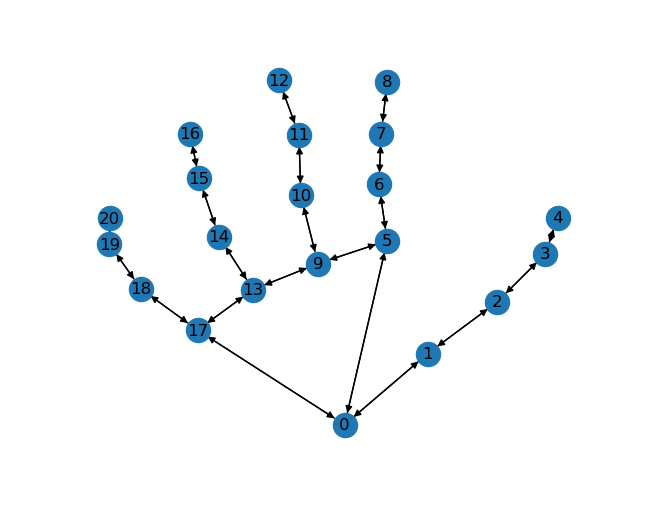

In [19]:
g = to_networkx(data)

for i in range(21):
    g.nodes[i]['pos'] = (sample_x[i][0].item(), sample_x[i][1].item())

nx.draw(g, pos=nx.get_node_attributes(g, 'pos'), with_labels=True)
plt.show()